In [1]:
import optuna


def objective(trial):
    x = trial.suggest_uniform('x',-10,10)
    return (x-2)**2

In [2]:
study = optuna.create_study()#pruner指定できる
study.optimize(objective, n_trials=100)

[I 2019-10-03 10:54:19,346] Finished trial#0 resulted in value: 3.1715036046342178. Current best value is 3.1715036046342178 with parameters: {'x': 0.21912841433352703}.
[I 2019-10-03 10:54:19,378] Finished trial#1 resulted in value: 61.95659919923789. Current best value is 3.1715036046342178 with parameters: {'x': 0.21912841433352703}.
[I 2019-10-03 10:54:19,412] Finished trial#2 resulted in value: 31.52490882571721. Current best value is 3.1715036046342178 with parameters: {'x': 0.21912841433352703}.
[I 2019-10-03 10:54:19,445] Finished trial#3 resulted in value: 96.084725246671. Current best value is 3.1715036046342178 with parameters: {'x': 0.21912841433352703}.
[I 2019-10-03 10:54:19,479] Finished trial#4 resulted in value: 92.13446483432035. Current best value is 3.1715036046342178 with parameters: {'x': 0.21912841433352703}.
[I 2019-10-03 10:54:19,513] Finished trial#5 resulted in value: 91.41622704095417. Current best value is 3.1715036046342178 with parameters: {'x': 0.2191284

[I 2019-10-03 10:54:22,905] Finished trial#95 resulted in value: 0.4138671855715072. Current best value is 0.0002625289317362319 with parameters: {'x': 1.9837972554258165}.
[I 2019-10-03 10:54:22,948] Finished trial#96 resulted in value: 0.6169934296642753. Current best value is 0.0002625289317362319 with parameters: {'x': 1.9837972554258165}.
[I 2019-10-03 10:54:22,989] Finished trial#97 resulted in value: 0.014998272012162769. Current best value is 0.0002625289317362319 with parameters: {'x': 1.9837972554258165}.
[I 2019-10-03 10:54:23,032] Finished trial#98 resulted in value: 2.1041085943588693. Current best value is 0.0002625289317362319 with parameters: {'x': 1.9837972554258165}.
[I 2019-10-03 10:54:23,074] Finished trial#99 resulted in value: 0.5256240574202102. Current best value is 0.0002625289317362319 with parameters: {'x': 1.9837972554258165}.


In [3]:
study.best_params

{'x': 1.9837972554258165}

In [4]:
study.best_value

0.0002625289317362319

In [5]:
study.best_trial

FrozenTrial(number=92, state=<TrialState.COMPLETE: 1>, value=0.0002625289317362319, datetime_start=datetime.datetime(2019, 10, 3, 10, 54, 22, 742792), datetime_complete=datetime.datetime(2019, 10, 3, 10, 54, 22, 776029), params={'x': 1.9837972554258165}, distributions={'x': UniformDistribution(low=-10, high=10)}, user_attrs={}, system_attrs={'_number': 92}, intermediate_values={}, trial_id=92)

In [6]:
study.trials

[FrozenTrial(number=0, state=<TrialState.COMPLETE: 1>, value=3.1715036046342178, datetime_start=datetime.datetime(2019, 10, 3, 10, 54, 19, 316488), datetime_complete=datetime.datetime(2019, 10, 3, 10, 54, 19, 346667), params={'x': 0.21912841433352703}, distributions={'x': UniformDistribution(low=-10, high=10)}, user_attrs={}, system_attrs={'_number': 0}, intermediate_values={}, trial_id=0),
 FrozenTrial(number=1, state=<TrialState.COMPLETE: 1>, value=61.95659919923789, datetime_start=datetime.datetime(2019, 10, 3, 10, 54, 19, 349079), datetime_complete=datetime.datetime(2019, 10, 3, 10, 54, 19, 378093), params={'x': 9.8712514379378}, distributions={'x': UniformDistribution(low=-10, high=10)}, user_attrs={}, system_attrs={'_number': 1}, intermediate_values={}, trial_id=1),
 FrozenTrial(number=2, state=<TrialState.COMPLETE: 1>, value=31.52490882571721, datetime_start=datetime.datetime(2019, 10, 3, 10, 54, 19, 380562), datetime_complete=datetime.datetime(2019, 10, 3, 10, 54, 19, 411728), 

In [7]:
len(study.trials)

100

＃＃＃Advanced Configurations

In [8]:
def objective(trial):
    #Categorical parameter
    optimizer =trial.suggest_categorical('optimizer',['MomnetumSGD','Adam'])
    
    #Int parameter
    num_layers = trial.suggest_int('num_layers',1,3)
    
    #uniform parameter
    dropout_rate = trial.suggest_uniform('dropout_rate',0.0,1.0)
    
    #Longuniform parameter
    learning_rate = trial.suggest_longuniform('learning_rate',1e-5,1e-2)
    
    #Discrete-uniform parameter
    drop_path_rate = trial.suggest_descrete_uniform('drop_path_rate',0.0,1.0,0.1)

In [9]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier',['SVC','RandomForest'])
    if classifier_name =='SVC':
        svc_c =trial.suggest_longuniform('svc_c',1e-10,1e10)
        classifier_obj = sklearn.svm.SVC(C=svc_c)
    else:
        
        
        

SyntaxError: unexpected EOF while parsing (<ipython-input-9-be79138843cf>, line 9)

In [ ]:
def create_model(trial):
    n_layers = trial.suggest_int('n_layers',1,3)
    
    layers = []
    for i in range(n_layers):
        n_units = int(trial.suggest_longuniform('n_units_l{}'.format(i),4,128))
        layers.append(L.Linear(None, n_units))
        layers.append((F.relu))
    layers.append(L.Linear(None,10))
    return chainer.Sequential(*layers)


In [ ]:
study.best_params  # Get best parameters for the objective function.
study.best_value  # Get best objective value.
study.best_trial  # Get best trial's information.
study.trials  # Get all trials' information.

In [10]:
"""filename: prune.py"""

import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

import optuna

def objective(trial):
    iris = sklearn.datasets.load_iris()
    classes = list(set(iris.target))
    train_x, test_x, train_y, test_y = \
        sklearn.model_selection.train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    clf = sklearn.linear_model.SGDClassifier(alpha=alpha)

    for step in range(100):
        clf.partial_fit(train_x, train_y, classes=classes)

        # Report intermediate objective value.
        intermediate_value = 1.0 - clf.score(test_x, test_y)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.structs.TrialPruned()

    return 1.0 - clf.score(test_x, test_y)

# Set up the median stopping rule as the pruning condition.
study = optuna.create_study(pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=20)

[I 2019-10-03 10:54:30,008] Finished trial#0 resulted in value: 0.1578947368421053. Current best value is 0.1578947368421053 with parameters: {'alpha': 0.028849279692129262}.
[I 2019-10-03 10:54:30,183] Finished trial#1 resulted in value: 0.052631578947368474. Current best value is 0.052631578947368474 with parameters: {'alpha': 0.010906160491942277}.
[I 2019-10-03 10:54:30,401] Finished trial#2 resulted in value: 0.23684210526315785. Current best value is 0.052631578947368474 with parameters: {'alpha': 0.010906160491942277}.
[I 2019-10-03 10:54:30,645] Finished trial#3 resulted in value: 0.052631578947368474. Current best value is 0.052631578947368474 with parameters: {'alpha': 0.010906160491942277}.
[I 2019-10-03 10:54:30,917] Finished trial#4 resulted in value: 0.052631578947368474. Current best value is 0.052631578947368474 with parameters: {'alpha': 0.010906160491942277}.
[I 2019-10-03 10:54:30,928] Setting status of trial#5 as TrialState.PRUNED. 
[I 2019-10-03 10:54:30,978] Setti

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test.head()

,Unnamed: 0,id,築年数,方角,面積,所在階,駐車場,周辺環境,建物構造,契約期間,...,プロパンガス,タイル張り,24時間換気システム,2面採光,3面採光,床暖房,出窓,クッションフロア,ロフト,冷房
0,0,31471,49年0ヶ月,南,50.22m2,8階／8階建,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN,...,False,False,False,False,False,False,False,False,False,False
1,1,31472,0年2ヶ月,南東,20.88m2,3階／4階建,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間,...,False,False,False,False,False,False,False,False,False,False
2,2,31473,23年4ヶ月,南東,26.93m2,1階／4階建,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間,...,False,True,False,True,False,False,False,False,False,False
3,3,31474,36年2ヶ月,南東,23.57m2,1階／2階建,駐輪場\t空有\t0円,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,木造,2年間,...,False,False,False,True,False,False,False,False,False,False
4,4,31475,45年4ヶ月,南,50m2,4階／4階建,"駐車場\t近隣\t22,600円\t距離177m",【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間,...,False,False,False,False,False,False,False,False,False,True


In [3]:
import lightgbm as lgb
import optuna

/Users/masatoota/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = train.drop(['Unnamed: 0','id', '賃料','築年数', '方角', '面積', '所在階', '駐車場','周辺環境', '建物構造', '契約期間', '区'], axis=1)
y_train = train['賃料']
#X_test = test.drop(['id'], axis=1)
#X_trainとy_trainをtrain とvalidに分割
train_x,valid_x,train_y,valid_y = train_test_split(X_train,y_train,test_size=0.33,random_state=0)
#lgb.Datasetでtrainとvalidを作っておく
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval =lgb.Dataset(valid_x,valid_y)

def objective(trial):
    drop_rate = trial.suggest_uniform('drop_rate', 0, 1.0)
    feature_fraction = trial.suggest_uniform('feature_fraction', 0, 1.0)
    learning_rate = trial.suggest_uniform('learning_rate', 0, 1.0)
    subsample = trial.suggest_uniform('subsample', 0.8, 1.0)
    num_leaves = trial.suggest_int('num_leaves', 5, 1000)
    verbosity = trial.suggest_int('verbosity', -1, 1)
    num_boost_round = trial.suggest_int('num_boost_round', 10, 100000)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 10, 100000)
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100)
    min_child_weight = trial.suggest_int('min_child_weight', 5, 500)
    #パラメータの定義
    params = {"objective": "regression",
              "metric": 'rmse',
              "boosting_type": "gbdt",
              "learning_rate": learning_rate,
              "num_leaves": num_leaves,
              "max_bin": 255,
              'colsample_bytree': 0.8,
              'subsample': 0.8,
              "feature_fraction": feature_fraction,
              "verbosity": verbosity,
              "drop_rate": drop_rate,
              "is_unbalance": False,
              "max_drop": 50,
              "min_child_samples": min_child_samples,
              "min_child_weight": min_child_weight,
              "min_split_gain": 0,
              "min_data_in_leaf": min_data_in_leaf,
              "subsample": subsample,
              'seed': 1,
              }
    eval_result = {}
    gbm =lgb.train( params,
                            train_set = lgb_train,
                            valid_sets = [lgb_train,lgb_eval],
                            num_boost_round=5000, 
                            early_stopping_rounds = 200,
                            evals_result = eval_result,
                            verbose_eval = 100)


study = optuna.create_study()
study.optimize(objective, n_trials=10)

Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:46,653] Setting status of trial#0 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:47,052] Setting status of trial#1 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:47,444] Setting status of trial#2 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:47,844] Setting status of trial#3 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:48,238] Setting status of trial#4 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:48,643] Setting status of trial#5 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:49,096] Setting status of trial#6 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:49,717] Setting status of trial#7 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:50,011] Setting status of trial#8 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 139669	valid_1's rmse: 140700
Early stopping, best iteration is:
[1]	training's rmse: 139669	valid_1's rmse: 140700


[W 2019-10-03 23:00:50,350] Setting status of trial#9 as TrialState.FAIL because the returned value from the objective function cannot be casted to float. Returned value is: None


In [8]:
oof = gbm.predict(test.drop(['Unnamed: 0','id','築年数', '方角', '面積', '所在階', '駐車場','周辺環境', '建物構造', '契約期間', '区'], axis=1))
oof

array([280106.21313324, 123859.76403083,  80060.56630956, ...,
       186066.29238371, 233638.77666212,  86661.92538831])

/Users/masatoota/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


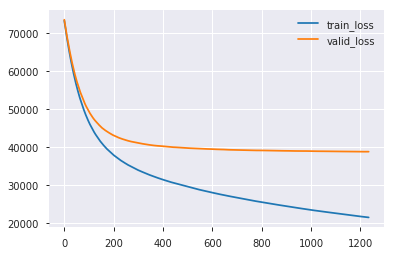

In [9]:
plt.plot(eval_result['training']['rmse'],label='train_loss')
plt.plot(eval_result['valid_1']['rmse'],label='valid_loss')
plt.legend()

In [ ]:
#駅名の連結を表す隣接グラフの構築
